In [1]:
import os
import sys
import inspect

print(sys.version)

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)

sys.path.insert(0, parentdir) 

import read_data
import featureSpan
import Utils
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.optimize
import scipy.stats as ss
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
list1M = read_data.readData("../data/DATA_HE_monazite.dat")
print(list1M.shape)

(525, 4)


In [3]:
list2M = read_data.readCSVData("../data/Data_Ln-monazite.csv", Volume=True)
print(list2M.shape)

(15, 9)


In [4]:
list1X = read_data.readData("data/DATA_HE_xenotime.dat")
print("Shape of List1X is {}".format(list1X.shape))
print(list1X)

Shape of List1X is (525, 4)
[[5.70000000e+01 5.80000000e+01 7.50000000e-01 2.31598225e-01]
 [5.70000000e+01 5.80000000e+01 6.25000000e-01 2.78958493e-01]
 [5.70000000e+01 5.80000000e+01 5.00000000e-01 2.97583757e-01]
 ...
 [7.00000000e+01 7.10000000e+01 5.00000000e-01 7.77590152e-02]
 [7.00000000e+01 7.10000000e+01 3.75000000e-01 7.09266168e-02]
 [7.00000000e+01 7.10000000e+01 2.50000000e-01 5.91211365e-02]]


In [5]:
list2X = read_data.readCSVData("data/Data_Ln-xenozite.csv", material = "xenotime", Volume=True)
print("Shape of List2X is {}".format(list2X.shape))
print((list2X))

Shape of List2X is (15, 9)
[[ 57.         138.90547     19.1773      91.7         11.
    1.1         49.95        83.16086967   1.16      ]
 [ 58.         140.116       20.198       99.73        12.
    1.12        36.758       81.11579575   1.143     ]
 [ 59.         140.90765     21.624      112.27        12.3
    1.13        38.98        79.31176899   1.126     ]
 [ 60.         144.242       22.1        120.19        12.95
    1.14        40.41        77.89975607   1.109     ]
 [ 61.         145.          22.3        127.26        13.6
    1.13        41.1         76.63526873   1.093     ]
 [ 62.         150.36        23.4        137.16        14.25
    1.17        41.4         75.42961529   1.079     ]
 [ 63.         151.964       24.92       143.83        14.9
    1.2         42.7         74.36126731   1.066     ]
 [ 64.         157.25        20.63       149.42        15.9
    1.2         44.          73.33463097   1.053     ]
 [ 65.         158.92535     21.91       156.33      

In [6]:
listXM, listYM = featureSpan.computeMean(list1M, list2M)
XM = np.asarray(listXM)
YM = np.asarray(listYM)
print(XM.shape)
print(YM.shape)

(525, 27)
(525,)


In [7]:
listXX, listYX = featureSpan.computeMean(list1X, list2X)
XX = np.asarray(listXX)
YX = np.asarray(listYX)
print(XX.shape)
print(YX.shape)

(525, 27)
(525,)


In [8]:
X = np.concatenate((XM, XX), axis=0)
Y = np.concatenate((YM, YX), axis=0)
print(X.shape)
print(Y.shape)

(1050, 27)
(1050,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=24)
print(len(X_train),len(X_test), len(y_train), len(y_test))

787 263 787 263


In [10]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

### Polynomial Degree 3

#### My Optimized Hyperparameters

In [11]:
krp3 = GridSearchCV(
    KernelRidge(kernel="polynomial", gamma=0.1, degree=3),
    param_grid={"alpha": np.logspace(-10, 10, 20), "coef0": np.logspace(-10, 10, 20), "gamma": np.logspace(-1.0, 1.0, 20)},
)

In [12]:
krp3.fit(X_train.copy(), y_train.copy())

GridSearchCV(estimator=KernelRidge(gamma=0.1, kernel='polynomial'),
             param_grid={'alpha': array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7....
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10]),
                         'gamma': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

In [13]:
optimized_p3 = krp3.best_estimator_
print(np.log10([optimized_p3.alpha,  optimized_p3.coef0, optimized_p3.gamma]), optimized_p3.kernel)

[4.73684211 5.78947368 0.36842105] polynomial


<AxesSubplot:xlabel='param_gamma', ylabel='param_coef0'>

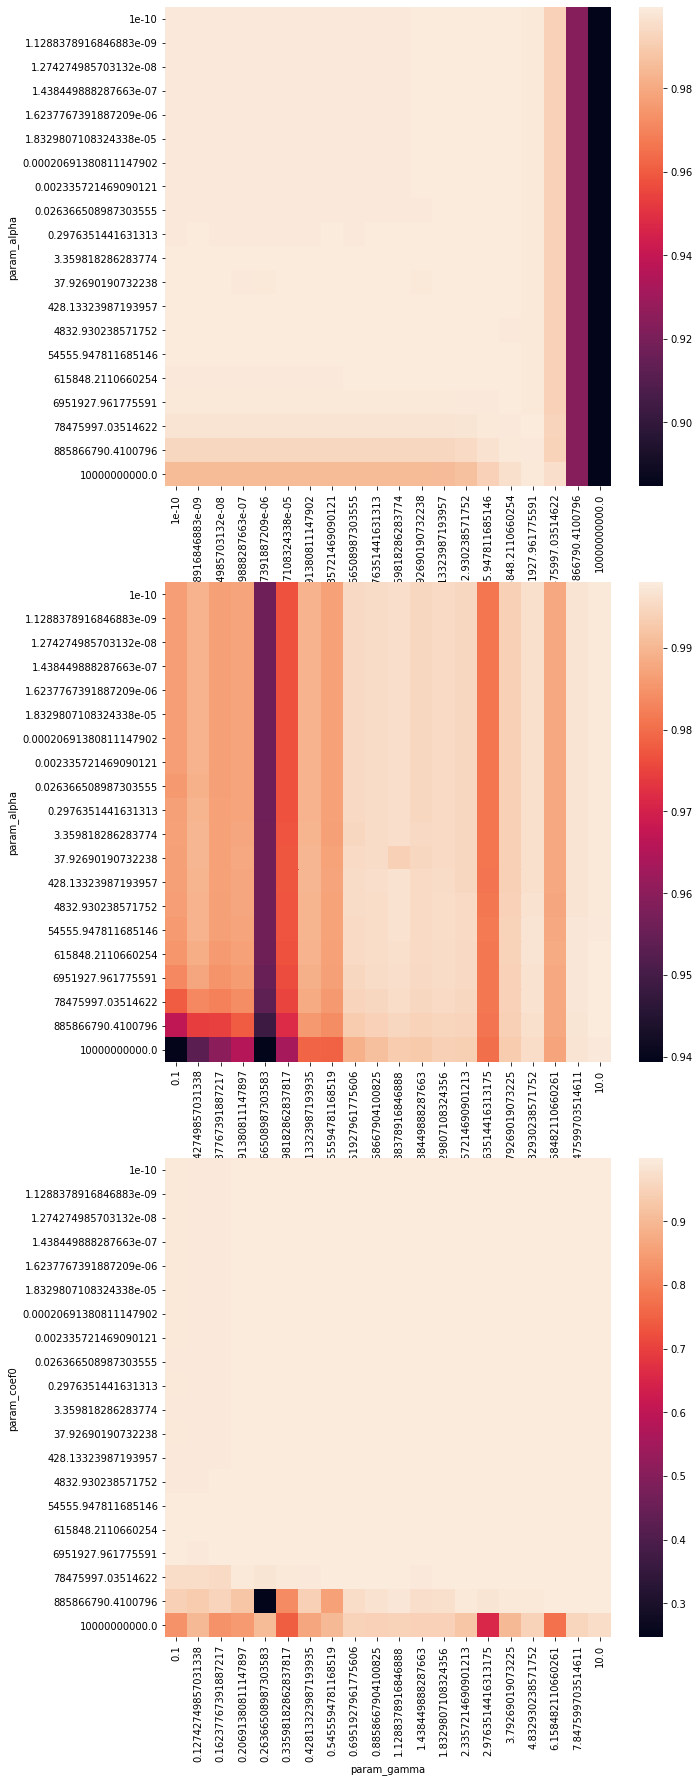

In [14]:
#[10.52631579  8.21052632  0.32222222] polynomial
fig, ax =plt.subplots(3,1,figsize=(10,30))
pvt_p3 = pd.pivot_table(pd.DataFrame(krp3.cv_results_), values='mean_test_score', index='param_alpha', columns='param_coef0')
sns.heatmap(pvt_p3,ax=ax[0])
pvt_p3 = pd.pivot_table(pd.DataFrame(krp3.cv_results_), values='mean_test_score', index='param_alpha', columns='param_gamma')
sns.heatmap(pvt_p3,ax=ax[1])
pvt_p3 = pd.pivot_table(pd.DataFrame(krp3.cv_results_), values='mean_test_score', index='param_coef0', columns='param_gamma')
sns.heatmap(pvt_p3,ax=ax[2])

In [15]:
model_p3=KernelRidge(alpha=optimized_p3.alpha, kernel=optimized_p3.kernel, coef0=optimized_p3.coef0, gamma=optimized_p3.gamma, kernel_params={"degree": 3})

In [16]:
model_p3.fit(X_train.copy(), y_train.copy())

KernelRidge(alpha=54555.947811685146, coef0=615848.2110660254,
            gamma=2.3357214690901213, kernel='polynomial',
            kernel_params={'degree': 3})

In [17]:
fit_test_p3 = model_p3.predict(X_test.copy())
fit_train_p3 = model_p3.predict(X_train.copy())

In [18]:
Utils.print_error(y_test, fit_test_p3, "test set")
Utils.print_error(y_train, fit_train_p3, "train set")

test set
Mean absolute error: 0.022788808905774706
Mean squared error: 0.0011080413564058297
Max error: 0.1864511717421875
True value: 0.222446655140625
Predicted value: 0.0359954833984375
train set
Mean absolute error: 0.00902235735797531
Mean squared error: 0.0001487810644595409
Max error: 0.10408510363281254
True value: 0.5459185997265625
Predicted value: 0.44183349609375


#### cross validation

In [19]:
score_p3 = cross_val_score(model_p3, X, Y, cv=cv)
print(score_p3)

[0.99980542 0.99991604 0.99991724 0.99986276 0.99980234]


In [20]:
for train_index, test_index in cv.split(Y):
    fit_test = model_p3.predict(X.copy()[test_index])
    fit_train = model_p3.predict(X.copy()[train_index])
    
    print("--")
    print("### Cross Validation ###")
    print("--")
    Utils.print_error(Y.copy()[train_index], fit_train, "train set")
    Utils.print_error(Y.copy()[test_index], fit_test, "test set")
    

--
### Cross Validation ###
--
train set
Mean absolute error: 0.012607833606694725
Mean squared error: 0.00037506411194596306
Max error: 0.17054176387499997
True value: 0.762918472859375
Predicted value: 0.592376708984375
test set
Mean absolute error: 0.0120285888436312
Mean squared error: 0.00043038656367945554
Max error: 0.1864511717421875
True value: 0.222446655140625
Predicted value: 0.0359954833984375
--
### Cross Validation ###
--
train set
Mean absolute error: 0.013016173485953384
Mean squared error: 0.00044265036289054894
Max error: 0.1864511717421875
True value: 0.222446655140625
Predicted value: 0.0359954833984375
test set
Mean absolute error: 0.010801659826431817
Mean squared error: 0.00022802024946767262
Max error: 0.08329490718359356
True value: 2.6022768407773436
Predicted value: 2.51898193359375
--
### Cross Validation ###
--
train set
Mean absolute error: 0.012348189791574017
Mean squared error: 0.00035803430301146344
Max error: 0.17054176387499997
True value: 0.7629184

### Gaussian

#### My Optimized Hyperparameters

In [21]:
kr_g = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": np.logspace(-15, 15, 40), "gamma": np.logspace(-10, 10, 40)},
)

kr_g.fit(X_train.copy(), y_train.copy())
optimized_g = kr_g.best_estimator_
print(np.log10([optimized_g.alpha, optimized_g.gamma]), optimized_g.kernel)

[-13.46153846  -5.8974359 ] rbf


<AxesSubplot:xlabel='param_gamma', ylabel='param_alpha'>

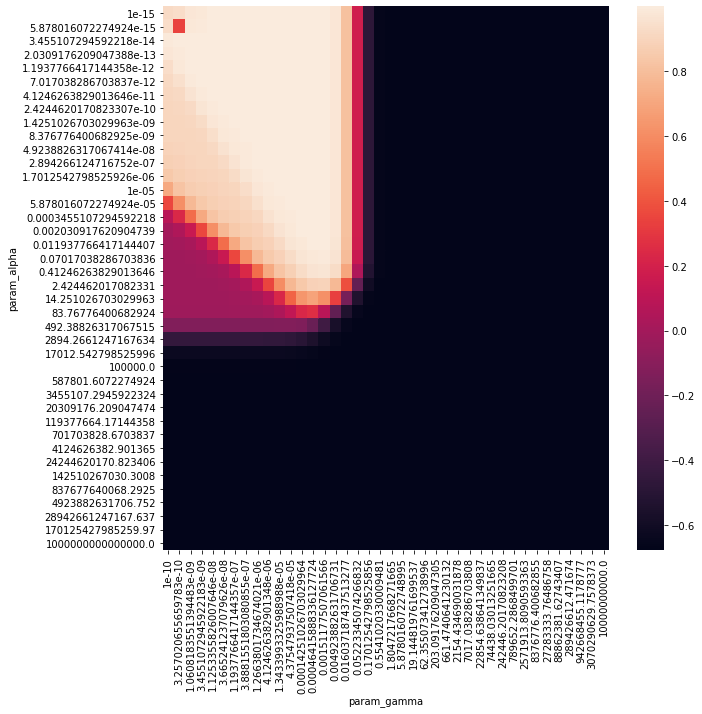

In [22]:
fig, ax =plt.subplots(1,1,figsize=(10,10))
pvt_g = pd.pivot_table(pd.DataFrame(kr_g.cv_results_), values='mean_test_score', index='param_alpha', columns='param_gamma')
sns.heatmap(pvt_g,ax=ax)

In [23]:
model_g=KernelRidge(alpha=optimized_g.alpha, kernel=optimized_g.kernel, coef0=0, gamma=optimized_g.gamma) 


In [24]:
model_g.fit(X_train.copy(), y_train.copy())

KernelRidge(alpha=3.455107294592218e-14, coef0=0, gamma=1.2663801734674021e-06,
            kernel='rbf')

In [25]:
fit_test_g = model_g.predict(X_test.copy())
fit_train_g = model_g.predict(X_train.copy())

In [26]:
Utils.print_error(y_test, fit_test_g, "test set")
Utils.print_error(y_train, fit_train_g, "train set")

test set
Mean absolute error: 0.023463947380317256
Mean squared error: 0.001074561885105026
Max error: 0.17746925410937497
True value: 0.762918472859375
Predicted value: 0.58544921875
train set
Mean absolute error: 0.010761423982449189
Mean squared error: 0.00021599796784303502
Max error: 0.11403383410156254
True value: 0.5459185997265625
Predicted value: 0.431884765625


####  Cross Validation

In [27]:
score_g = cross_val_score(model_g, X, Y, cv=cv) 
print(score_g)

[0.99983479 0.99991628 0.99991634 0.99985127 0.99986563]


In [28]:
for train_index, test_index in cv.split(Y):
    fit_test = model_g.predict(X.copy()[test_index])
    fit_train = model_g.predict(X.copy()[train_index])
    
    print("--")
    print("### Cross Validation ###")
    print("--")
    Utils.print_error(Y.copy()[train_index], fit_train, "train set")
    Utils.print_error(Y.copy()[test_index], fit_test, "test set")

--
### Cross Validation ###
--
train set
Mean absolute error: 0.014105033433271132
Mean squared error: 0.00043520685440371157
Max error: 0.17746925410937497
True value: 0.762918472859375
Predicted value: 0.58544921875
test set
Mean absolute error: 0.01347939637589118
Mean squared error: 0.00041857892682307685
Max error: 0.13333765382031249
True value: 0.8974978100703125
Predicted value: 0.76416015625
--
### Cross Validation ###
--
train set
Mean absolute error: 0.014281106979421462
Mean squared error: 0.0004727711022166634
Max error: 0.17746925410937497
True value: 0.762918472859375
Predicted value: 0.58544921875
test set
Mean absolute error: 0.012937233787666378
Mean squared error: 0.00030579718378684226
Max error: 0.08530906733984356
True value: 2.6022768407773436
Predicted value: 2.5169677734375
--
### Cross Validation ###
--
train set
Mean absolute error: 0.013966345993676552
Mean squared error: 0.0004188835918870734
Max error: 0.17746925410937497
True value: 0.762918472859375
Pred

### Comparison and Analyze

In [29]:
err_train_p3 = Utils.compute_error(y_train, fit_train_p3)
err_train_g = Utils.compute_error(y_train, fit_train_g)

err_train_p3 = np.asarray(err_train_p3)
err_train_g = np.asarray(err_train_g)

err_train = np.stack((err_train_p3,  err_train_g), axis=1)

######

err_test_p3 = Utils.compute_error(y_test, fit_test_p3)
err_test_g = Utils.compute_error(y_test, fit_test_g)

err_test_p3 = np.asarray(err_test_p3)
err_test_g = np.asarray(err_test_g)

err_test = np.stack((err_test_p3, err_test_g), axis=1)




In [30]:
column_labels=["Polynomial 3", "Gaussian"]
df_train=pd.DataFrame(err_train,columns=column_labels)
df_test=pd.DataFrame(err_test,columns=column_labels)
df_train.update(df_train[["Polynomial 3", "Gaussian"]].applymap('{:,.6f}'.format))
df_test.update(df_test[["Polynomial 3",  "Gaussian"]].applymap('{:,.6f}'.format))


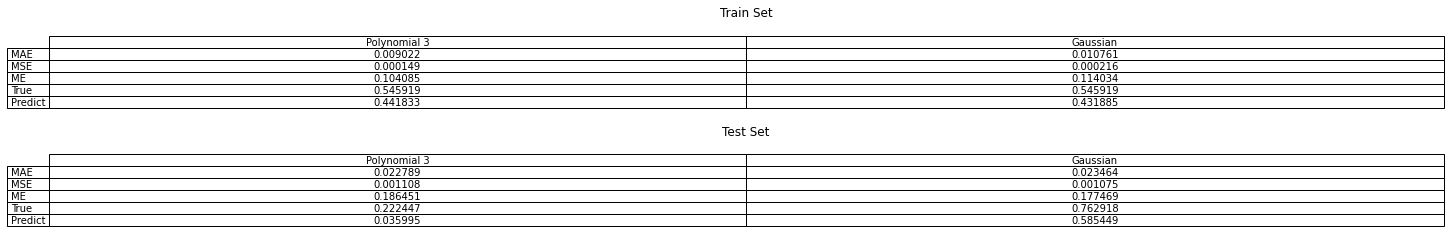

In [31]:
fig, ax =plt.subplots(2,1,figsize=(25,4))
ax[0].axis('tight')
ax[0].axis('off')
ax[1].axis('tight')
ax[1].axis('off')
ax[0].set_title("Train Set")
ax[1].set_title("Test Set")
ax[0].table(cellText=df_train.values,colLabels=df_train.columns,rowLabels=["MAE","MSE","ME","True","Predict"],loc="center",cellLoc='center')
ax[1].table(cellText=df_test.values,colLabels=df_test.columns,rowLabels=["MAE","MSE","ME","True","Predict"],loc="center",cellLoc='center')

In [32]:
rwth_blau = (0, 84 / 255, 159 / 255)
rwth_mangenta = (227 / 255, 0 / 255, 102 / 255)
rwth_gelb = (255 / 255, 237 / 255, 0 / 255)
rwth_gruen = (87 / 255, 171 / 255, 39 / 255)
rwth_orange = (246 / 255, 168 / 255, 0 / 255)
rwth_rot = (204 / 255, 7 / 255, 30 / 255)


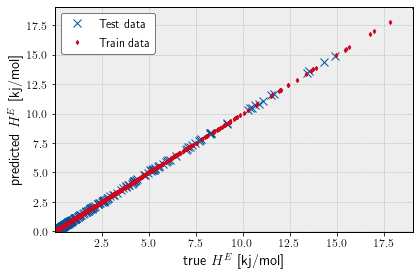

In [53]:
plt.figure()
plt.rc('text', usetex=True)
plt.style.use('bmh')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update({'font.size': 12})

plt.xlabel(r"true $H^E$ [kj/mol]")
plt.ylabel(r"predicted $H^E$ [kj/mol]")
min_value = min(np.min(y_test), np.min(y_train))
max_value = max(np.max(y_test), np.max(y_train))
plt.plot(y_test, fit_test_p3, 'x', label="Test data", color=rwth_blau, ms=8)
plt.plot(y_train, fit_train_p3, 'd', label="Train data", color=rwth_rot,ms=3)
plt.autoscale(enable=True, axis='both', tight=True)
plt.grid(True, which="both")

ax = plt.gca()
ax.tick_params(which='both', direction='out')
# plt.savefig("seperable.pdf")

plt.legend(facecolor='white', framealpha=1, edgecolor="black", loc="upper left")
plt.tight_layout()
plt.savefig("KRR_ploy3_fit.pdf")

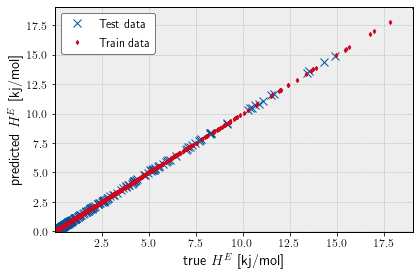

In [54]:
plt.figure()
plt.rc('text', usetex=True)
plt.style.use('bmh')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update({'font.size': 12})

plt.xlabel(r"true $H^E$ [kj/mol]")
plt.ylabel(r"predicted $H^E$ [kj/mol]")
min_value = min(np.min(y_test), np.min(y_train))
max_value = max(np.max(y_test), np.max(y_train))
plt.plot(y_test, fit_test_p3, 'x', label="Test data", color=rwth_blau, ms=8)
plt.plot(y_train, fit_train_p3, 'd', label="Train data", color=rwth_rot,ms=3)
plt.autoscale(enable=True, axis='both', tight=True)
plt.grid(True, which="both")

ax = plt.gca()
ax.tick_params(which='both', direction='out')
# plt.savefig("seperable.pdf")

plt.legend(facecolor='white', framealpha=1, edgecolor="black", loc="upper left")
plt.tight_layout()
plt.savefig("KRR_gauss_fit.pdf")